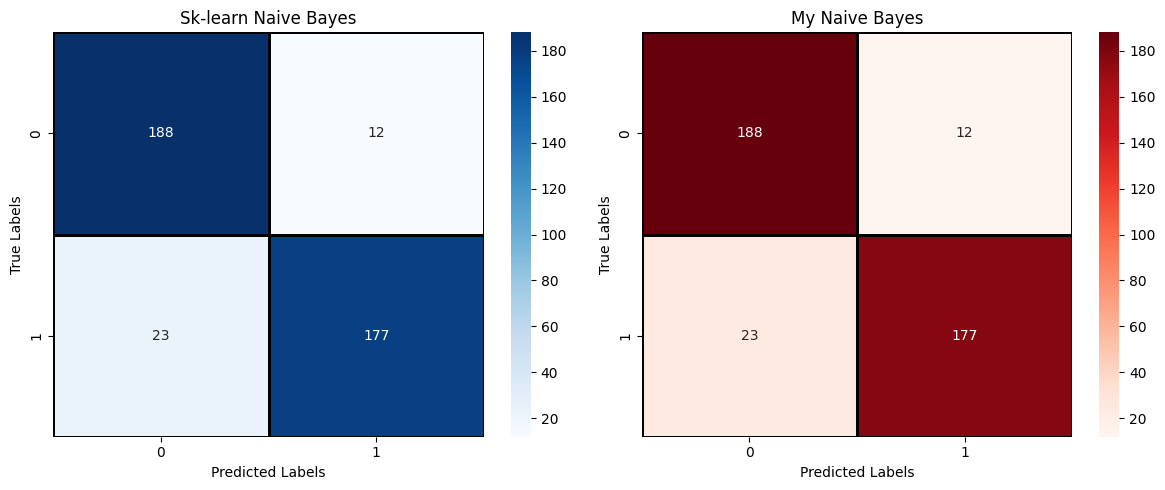

Sk-learn Model Accuracy: 0.9125
Manuel Model Accuracy: 0.9125
\Sk-learn Model Raporu:\n               precision    recall  f1-score   support

           0       0.89      0.94      0.91       200
           1       0.94      0.89      0.91       200

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

\nManuel Model Raporu:\n               precision    recall  f1-score   support

           0       0.89      0.94      0.91       200
           1       0.94      0.89      0.91       200

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

\Sk-learn Training Time: 0.0014 second
Scikit-learn Test Time: 0.0007 second

My Naive Bayes Training Time: 0.0003 second
My Naive Bayes Test Time: 0.0123 second


In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

url = "https://raw.githubusercontent.com/Orbadgu/MLabHW/main/naiveBayes/train.csv"

df = pd.read_csv(url)

df = df[["battery_power", "int_memory", "ram", "clock_speed", "dual_sim", "price_range"]]

df["price_range"] = (df["price_range"] >= 2).astype(int)

X = df.drop(columns=["price_range"])
y = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(X_train, y_train)
train_time_sklearn = time.time() - start_time

start_time = time.time()
y_pred_sklearn = nb_model.predict(X_test)
test_time_sklearn = time.time() - start_time

class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.variances[c] = np.var(X_c, axis=0) + 1e-9
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variances[c]))
            likelihood -= 0.5 * np.sum(((x - self.means[c]) ** 2) / self.variances[c])
            posteriors.append(prior + likelihood)

        return self.classes[np.argmax(posteriors)]

nb_manual = NaiveBayesClassifier()

start_time = time.time()
nb_manual.fit(X_train.values, y_train.values)
train_time_manual = time.time() - start_time

start_time = time.time()
y_pred_manual = nb_manual.predict(X_test.values)
test_time_manual = time.time() - start_time

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), linewidths=1, linecolor='black', ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title("Sk-learn Naive Bayes")

cm_manual = confusion_matrix(y_test, y_pred_manual)
sns.heatmap(cm_manual, annot=True, fmt='d', cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), linewidths=1, linecolor='black', ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title("My Naive Bayes")

plt.tight_layout()
plt.show()

print("Sk-learn Model Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Manuel Model Accuracy:", accuracy_score(y_test, y_pred_manual))

print(r"\Sk-learn Model Raporu:\n", classification_report(y_test, y_pred_sklearn))
print(r"\nManuel Model Raporu:\n", classification_report(y_test, y_pred_manual))

print(f"\\Sk-learn Training Time: {train_time_sklearn:.4f} second")
print(f"Scikit-learn Test Time: {test_time_sklearn:.4f} second")

print(f"\nMy Naive Bayes Training Time: {train_time_manual:.4f} second")
print(f"My Naive Bayes Test Time: {test_time_manual:.4f} second")
